In [280]:
import os
import numpy as np ## this is how you manage arrays and load text file
import matplotlib
import matplotlib.pyplot as plt ## this is plotting tool
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator


plt.style.use('flemch.mplstyle')

from matplotlib.ticker import NullFormatter  # useful for `logit` scale


In [281]:
%run PythonPlotFunctions.ipynb

# <font color=red> LOAD DATA

In [282]:
X =  np.loadtxt('../testCase/Mesh/CX.txt')
Y =  np.loadtxt('../testCase/Mesh/CY.txt')
normU =  np.loadtxt('../testCase/residual.txt')

input_dir = "../testCase/2000/"
output_dir = "./"


UX = np.loadtxt(os.path.join(input_dir, "UX.txt"))
UY = np.loadtxt(os.path.join(input_dir, "UY.txt"))
UZ = np.loadtxt(os.path.join(input_dir, "UZ.txt"))
P  = np.loadtxt(os.path.join(input_dir, "p.txt"))
R  = np.loadtxt(os.path.join(input_dir, "rho.txt"))
M  = np.loadtxt(os.path.join(input_dir, "mu.txt"))
D  = np.loadtxt(os.path.join(input_dir, "divphiU.txt"))

Nx = (X.shape[0])
Ny = (X.shape[1])

CNy = int((Nx+1)/2)
CNx = int((Ny+1)/2)

## <font color=red> Steamline Plots

In [283]:
def streamlineplots():
    x1 = X;
    y1 = Y;
    u1 = UX;
    u2 = UY;
    color = UX; #color
    width =1;
    denx=4;
    deny=4;
    xlim_l=0;
    xlim_u=1;
    ylim_l=0;
    ylim_u=1;
    title ='$U$ Velocity'
    figure=plot_streamline(x1, y1,u1,u2,color, width,denx,deny,xlim_l, xlim_u, ylim_l, ylim_u,title)
    figure.savefig(os.path.join(output_dir, "Solution_figurestream1.png"))         

## <font color=red> Contour Plots

In [284]:
def contourplots():

    xdata = X
    ydata = Y
    
    pdata = UX
    legendFormat = '%.2f'
    figure=plot_contour(xdata, ydata,pdata, "X","Y",'$U_x$ Velocity' ,'$U_x \;(m/s)$',legendFormat)
    figure.savefig(os.path.join(output_dir, "Solution_figure1.png"))
    
    pdata = UY
    figure=plot_contour(xdata, ydata,pdata, "X","Y",'$U_y$ Velocity' , '$U_y\;(m/s)$',legendFormat)
    figure.savefig(os.path.join(output_dir, "Solution_figure2.png"))
    
    pdata = UZ
    figure=plot_contour(xdata, ydata,pdata, "X","Y",'$U_z$ Velocity' , '$U_z\;(m/s)$',legendFormat)
    figure.savefig(os.path.join(output_dir, "Solution_figure3.png"))
    
    pdata = P
    figure=plot_contour(xdata, ydata,pdata, "X","Y",'Pressure', '$P\;(Pa)$',legendFormat)
    figure.savefig(os.path.join(output_dir, "Solution_figure4.png"))
    
    pdata = R
    figure=plot_contour(xdata, ydata,pdata, "X","Y", 'Density',r'$ \rho \;(kg/m^3)$',legendFormat)
    figure.savefig(os.path.join(output_dir, "Solution_figure5.png"))
    
    
    pdata = M
    figure=plot_contour(xdata, ydata,pdata, "X","Y", 'Dynamic Viscosity', r'$ \mu \;(Pa s)$',legendFormat)
    figure.savefig(os.path.join(output_dir, "Solution_figure6.png"))
    
    pdata = D
    legendFormat = '%.0e'
    figure=plot_contour(xdata, ydata,pdata, "X","Y", 'Divergence of Velocity', r'$ \nabla \cdot U $',legendFormat)
    figure.savefig(os.path.join(output_dir, "Solution_figure7.png"))

## <font color=red> Vector Plots

In [285]:
def vectorrplots():

    x1 = X;
    y1 = Y;
    u1 = UX;
    u2 = UY;
    color = UX; #color
    nskip =1;
    width =0.003;
    scale =50;
    xlim_l=0;
    xlim_u=1;
    ylim_l=0;
    ylim_u=1;
    title ='$U$ Velocity'
    lgtitle='$U \;(m/s)$'
    lgFormat = '%.2f'
    lgwidth = "5%"  # width = 5% of parent_bbox width
    figure=plot_vector(x1, y1,u1,u2,color,nskip, width,scale, xlim_l, xlim_u, ylim_l, ylim_u,title,lgtitle,lgFormat,lgwidth)
    figure.savefig(os.path.join(output_dir, "Solution_figurevector1.png"))

## <font color=red> Line Plots

In [286]:
def lineplots():
    """ X-Velocity Plots.
    """

    xdata = UX[:,CNx]
    ydata = Y[:,CNx]
    f_xdata, ax_xdata, p_xdata = plot_line(xdata, ydata, "Ux Velocity [m/sec]",
                                               "Y", "Vertical Geometric Center")

    f_xdata.savefig(os.path.join(output_dir, "Solution_figureline1.png"))


    ydata = UX[CNy,:]
    xdata =  X[CNy,:]

    f_xdata, ax_xdata, p_xdata = plot_line(xdata, ydata, "X","Ux Velocity [m/sec]",
                                                    "Horizontal Geometric Center")


    f_xdata.savefig(os.path.join(output_dir, "Solution_figureline2.png"))

    ########################################################################################################
    """ Y-Velocity Plots.
    """

    xdata = UY[:,CNx]
    ydata = Y[:,CNx]
    f_xdata, ax_xdata, p_xdata = plot_line(xdata, ydata, "Uy Velocity [m/sec]",
                                                   "Y", "Vertical Geometric Center")


    f_xdata.savefig(os.path.join(output_dir, "Solution_figureline3.png"))


    ydata = UY[CNy,:]
    xdata =  X[CNy,:]

    f_xdata, ax_xdata, p_xdata = plot_line(xdata, ydata, "X","Uy Velocity [m/sec]",
                                                    "Horizontal Geometric Center")

    f_xdata.savefig(os.path.join(output_dir, "Solution_figureline4.png"))

    ########################################################################################################
    """ P-pressure Plots.
    """

    xdata = P[:,CNx]
    ydata = Y[:,CNx]
    f_xdata, ax_xdata, p_xdata = plot_line(xdata, ydata, "Pressure [Pa]",
                                                   "Y", "Vertical Geometric Center")

    f_xdata.savefig(os.path.join(output_dir, "Solution_figureline5.png"))


    ydata = P[CNy,:]
    xdata =  X[CNy,:]

    f_xdata, ax_xdata, p_xdata = plot_line(xdata, ydata, "X","Pressure[Pa]",
                                                    "Horizontal Geometric Center")

    f_xdata.savefig(os.path.join(output_dir, "Solution_figureline6.png"))
    
    ########################################################################################################
    """ L2 Norm.
    """

    xdata = normU[:,0]
    ydata = normU[:,1]
    f_xdata, ax_xdata, p_xdata = plot_loglog(xdata, ydata, "Iteration",
                                                   "L2 Norm [U]", "L2 Norm of U")

    f_xdata.savefig(os.path.join(output_dir, "Solution_figurelineNorm1.png"))
    
    
    f_xdata, ax_xdata, p_xdata = plot_semilogy(xdata, ydata, "Iteration", "L2 Norm [U]", "L2 Norm of U")

    f_xdata.savefig(os.path.join(output_dir, "Solution_figurelineNorm2.png"))
    

# <font color=red> RESULTS FOR LID DRIVEN CAVITY

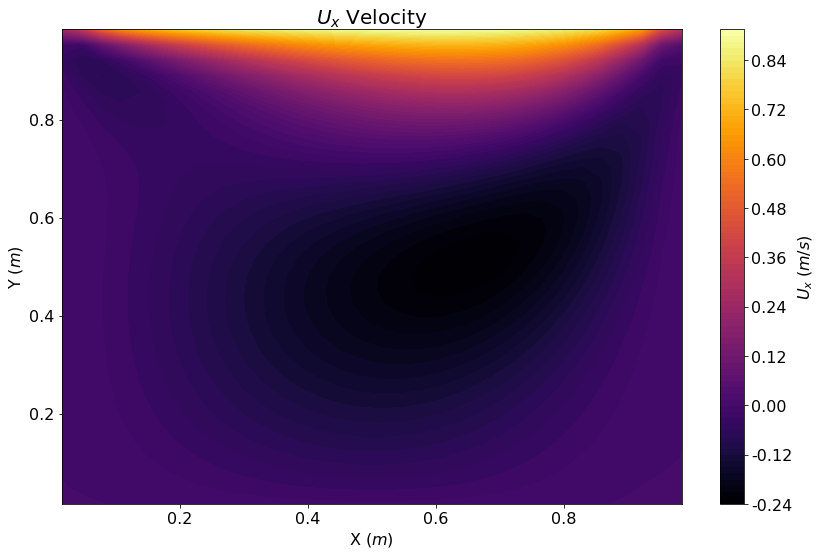

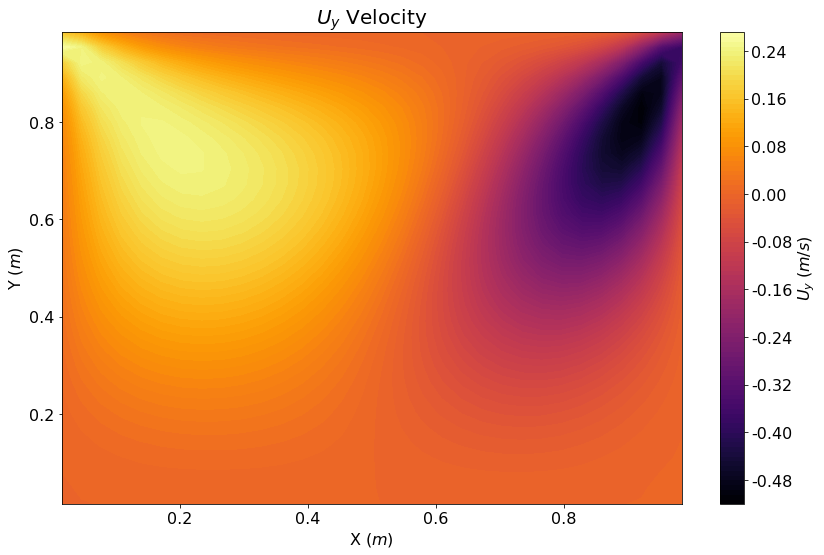

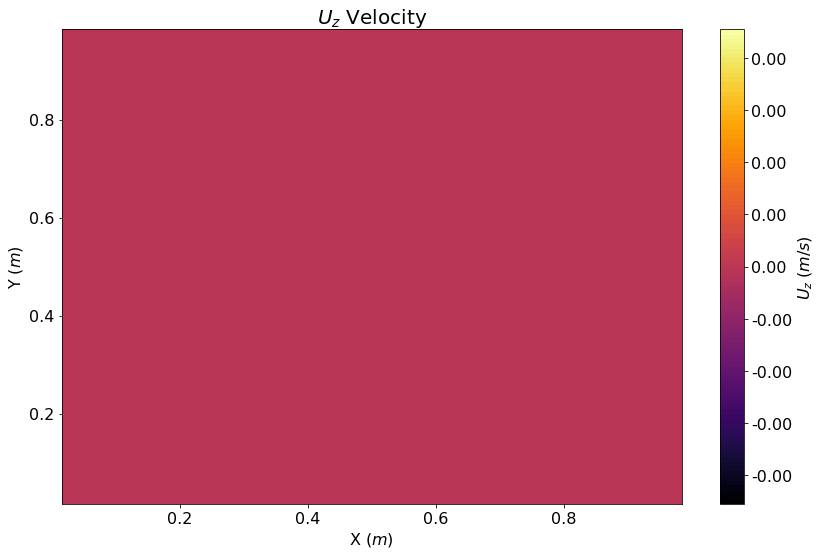

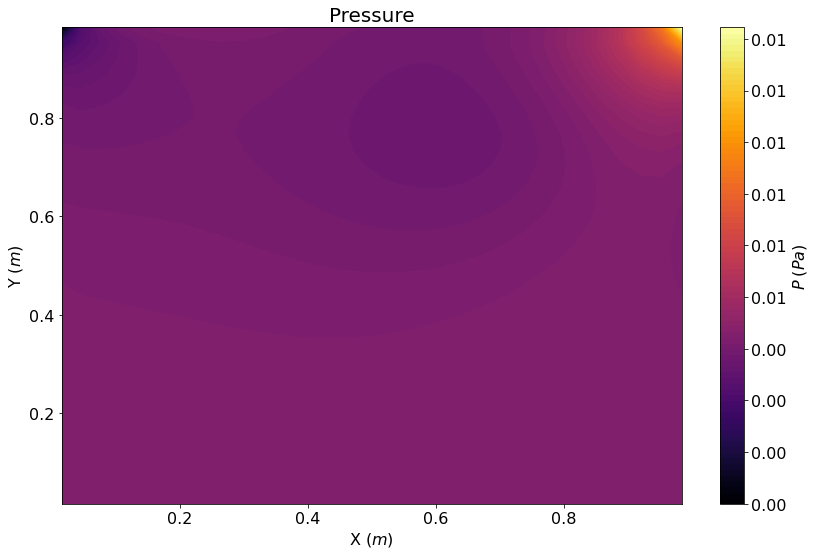

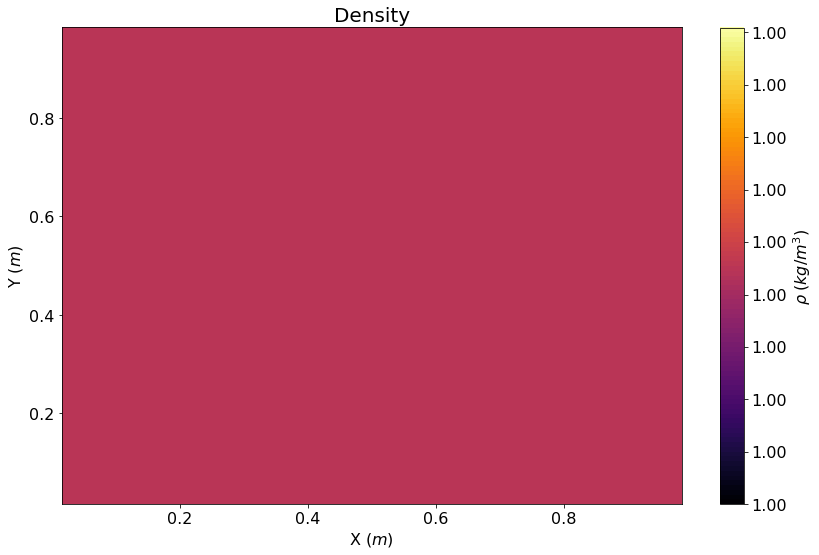

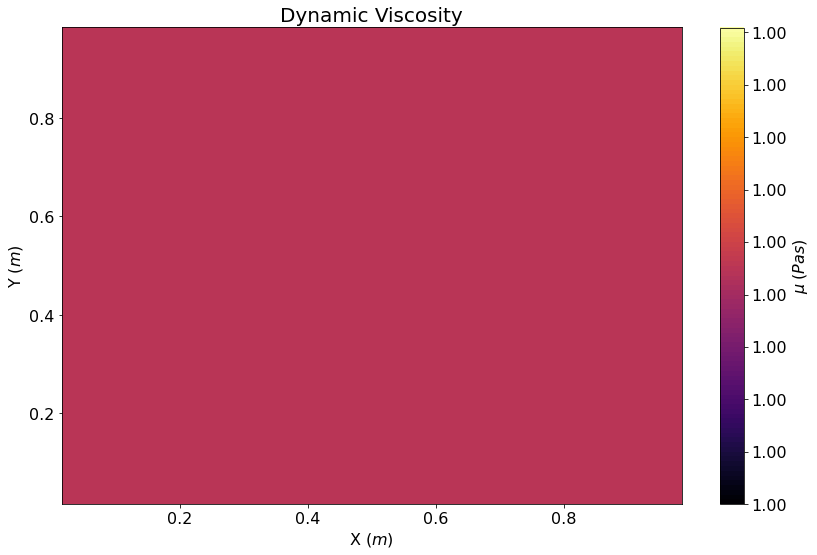

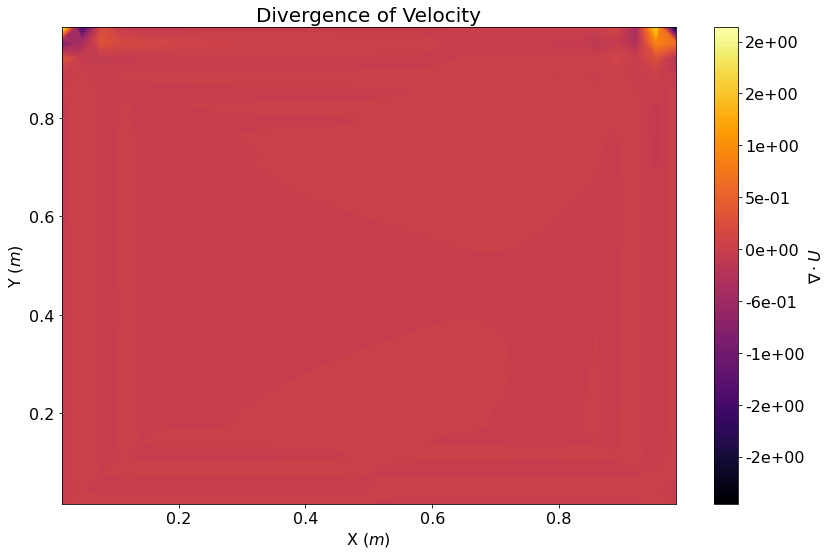

In [289]:
contourplots()

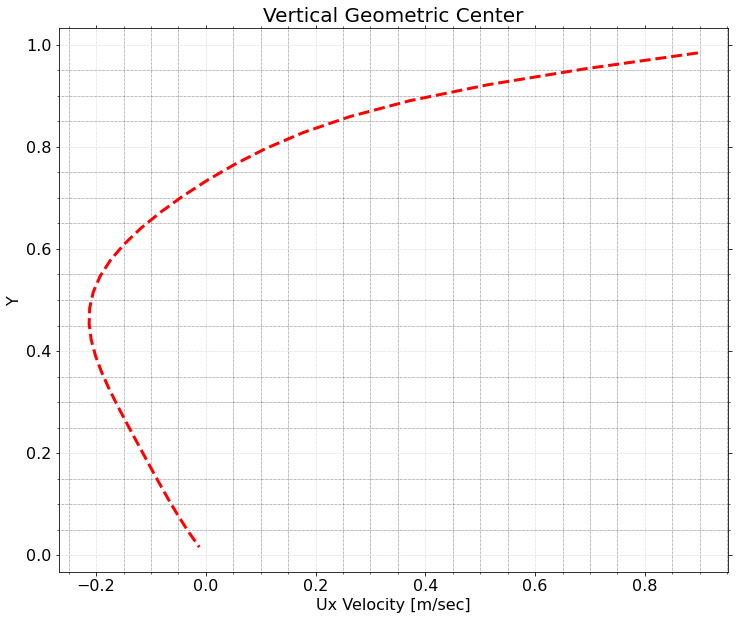

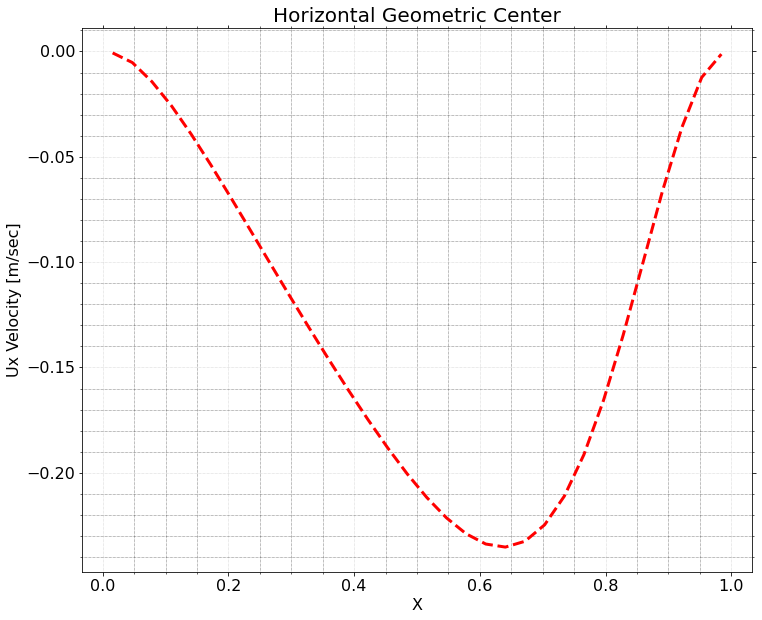

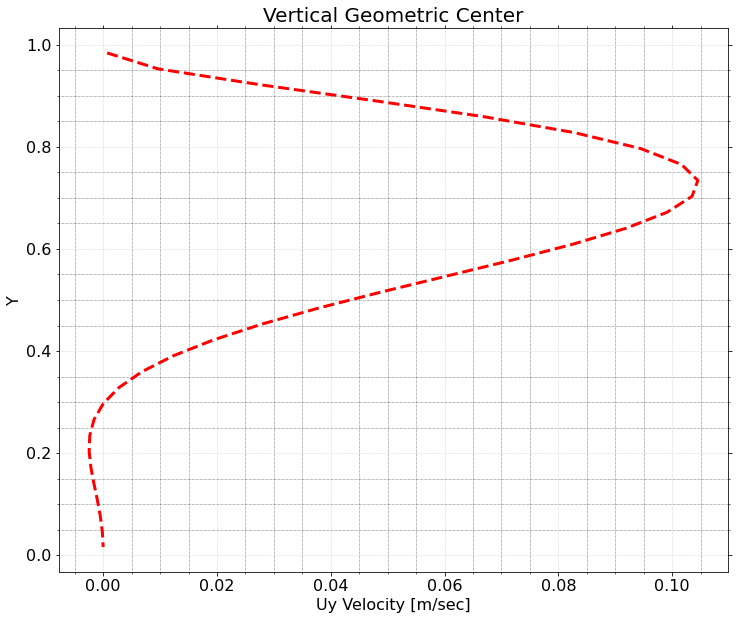

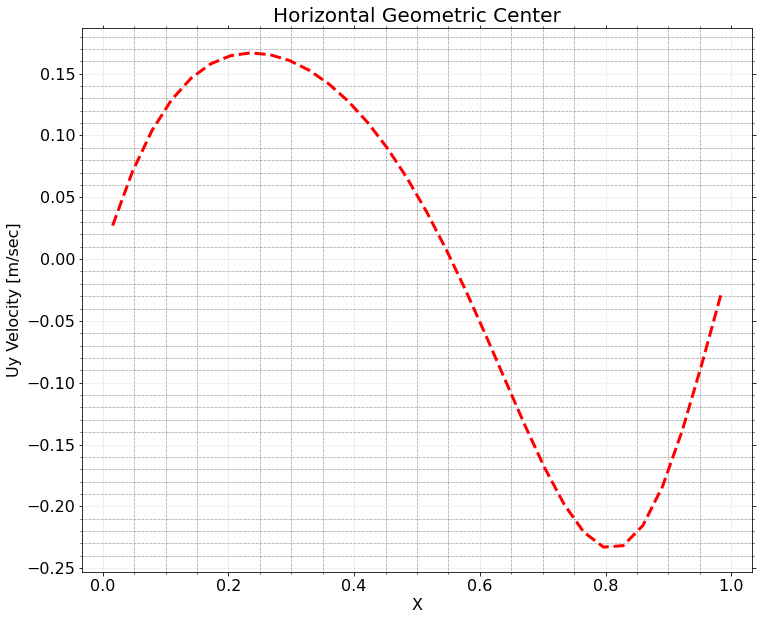

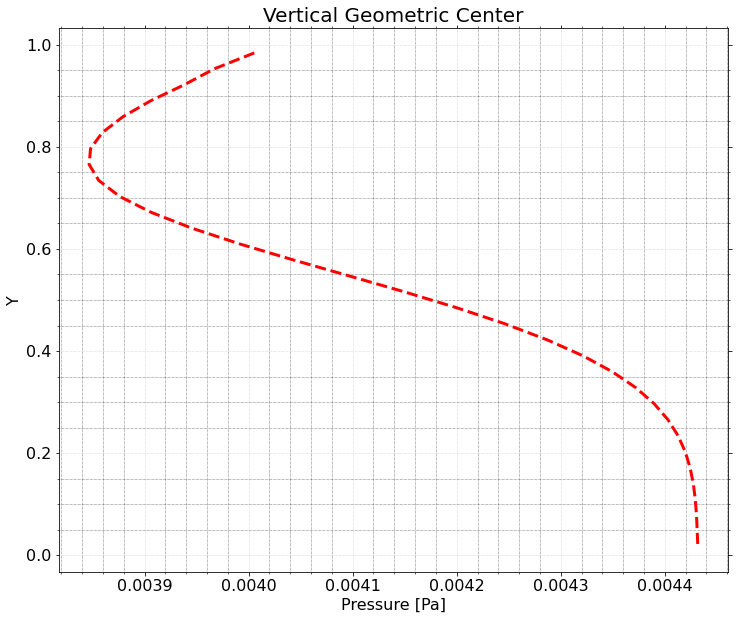

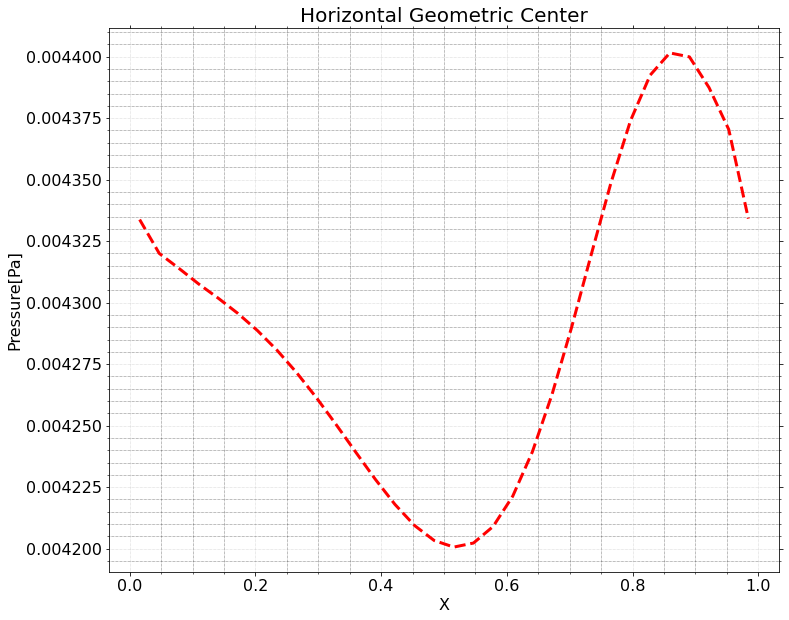

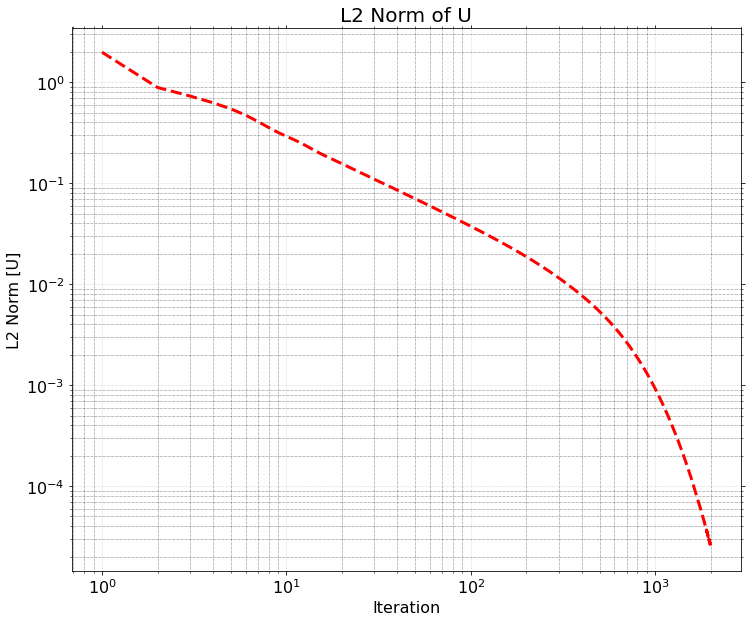

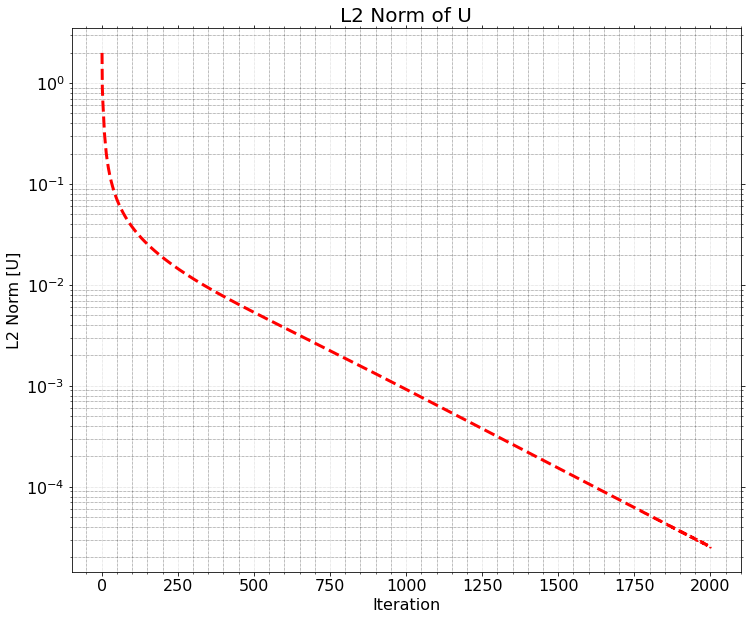

In [288]:
lineplots()

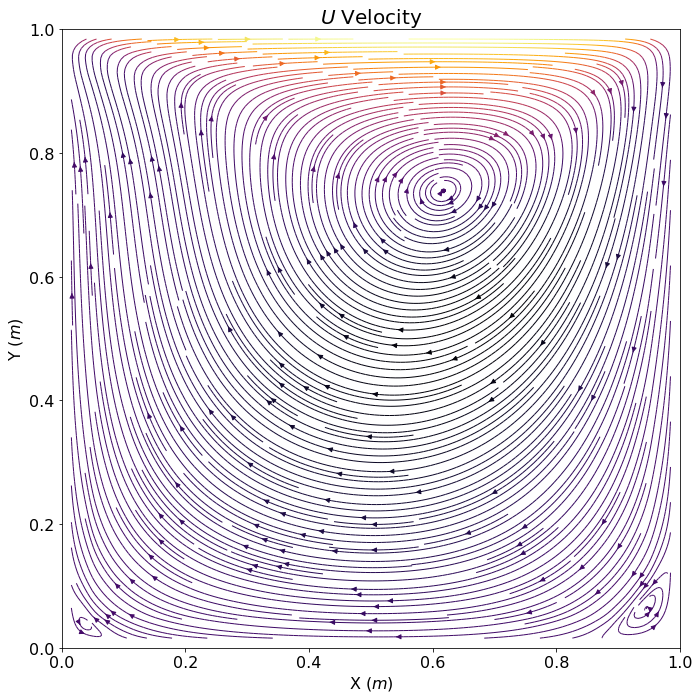

In [279]:
streamlineplots()

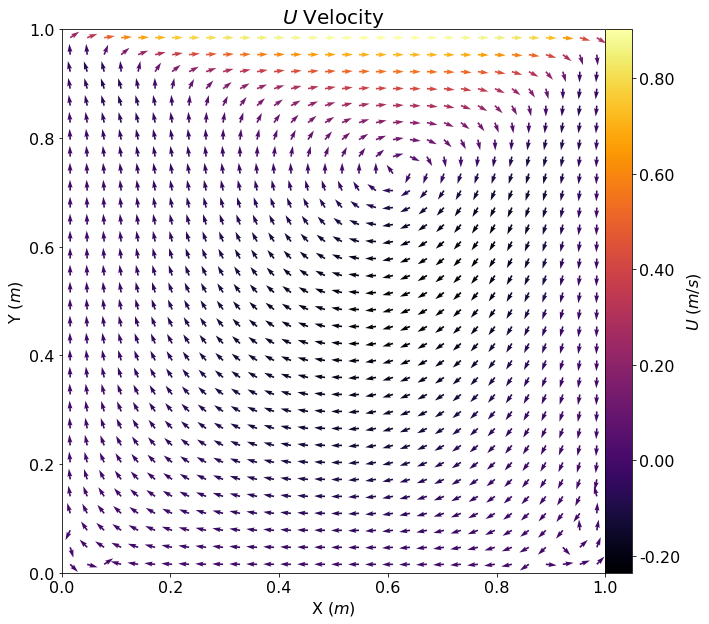

In [162]:
vectorrplots()